<a href="https://colab.research.google.com/github/aminayusif/Cyber-Guard/blob/main/CyberGuard_Machine_Learning_for_Cyberattack_Detection_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In today’s digital era, cyber threats are evolving rapidly, making traditional defense mechanisms increasingly inadequate. Organizations are now seeking intelligent, data-driven solutions to identify, classify, and mitigate cybersecurity threats in real time. This project, titled "CyberGuard: Machine Learning for Cyberattack Detection and Classification," applies machine learning (ML) techniques to network and system-level data to automatically detect and classify different types of cyberattacks.

The dataset used contains 40,000 labeled records of cybersecurity events, including features such as IP addresses, ports, protocols, payload data, anomaly scores, and metadata from firewall and intrusion detection systems. The primary objective is to develop a classification model that can predict the attack type based on these features, and optionally assess its severity level.

The project follows a complete ML pipeline, beginning with exploratory data analysis (EDA) to uncover patterns in attack behavior, protocol usage, and severity trends. In the data preprocessing phase, we handle missing values (particularly in logs such as IDS alerts and proxy information), encode categorical variables, and reduce high-cardinality fields that may lead to overfitting.

Feature engineering includes transforming timestamps into useful temporal features, encoding traffic types and protocols, and identifying significant indicators from anomaly scores. We then experiment with multiple supervised classification algorithms such as Random Forest, Logistic Regression, and Gradient Boosting, using grid search and cross-validation for optimization.

Model evaluation is conducted using metrics like accuracy, precision, recall, F1 score, and ROC-AUC. Confusion matrices and error analysis help interpret the model's performance and pinpoint common misclassifications, aiding in iterative improvements.

The final output is a trained ML model capable of identifying and classifying cyberattacks, which could be integrated into security systems for automated detection. The project not only demonstrates the practical use of machine learning in cybersecurity but also highlights the importance of combining domain knowledge with data science to build intelligent defense mechanisms.

This solution can help cybersecurity teams improve response times, reduce false positives, and better allocate resources in the face of increasingly sophisticated threats.

## Objectives

- Perform exploratory data analysis (EDA) on cybersecurity logs
- Clean and preprocess high-volume network data
- Engineer relevant features from raw logs
- Train and evaluate machine learning models to detect and classify attack types
- Analyze model performance using metrics and error analysis


## Exploratory Data Analysis and Data Preprocessing

### Import common libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Overview

 The dataset for this case study is provided in the file cybersecurity_attacks.csv
 and contains approximately 40,000 records. The key attributes include IP addresses, protocol, ports, payload data, anomaly scores, attack type

**Network activity** : IP, Port, Protocol, Packet Length

**System-level data** : User Info, Device Info, Geo-location

**Security-specific logs** : Anomaly Scores, Firewall Logs, Attack Signature

**Labels** : Attack Type, Severity Level

#### Import Dataset

In [2]:
import pandas as pd

data = pd.read_csv('cybersecurity_attacks.csv')

print("Dataset Overview:")
display(data.head())

print("\nColumn Information:")
display(data.info())

Dataset Overview:


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall



Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature 

None

In [3]:
data.shape

(40000, 25)

Dataset consists of 40,000 rows and 25 columns

Let's check for null values

In [4]:
data.isnull().sum()

,0
Timestamp,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Protocol,0
Packet Length,0
Packet Type,0
Traffic Type,0
Payload Data,0


These columns have null values:
1. Malware Indicators
2. Alerts/Warnings
3. Proxy Information
4. Firewall Logs
5. IDS/IPS Alerts


In [ ]:
# List of columns with null values to impute
columns_to_impute = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']

# Replace null values with "Unknown" or "No Data"
data[columns_to_impute] = data[columns_to_impute].fillna('Unknown')

print("\nNull values after imputation:")
display(data.isnull().sum())


Null values after imputation:


,0
Timestamp,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Protocol,0
Packet Length,0
Packet Type,0
Traffic Type,0
Payload Data,0


We now have no missing values in any column

We want to drop columns which have no substantial information:

1. Source IP Address
2. Destination IP Address
3. Payload Data
4. User Information
5. Device Information
6. Proxy Information

In [5]:
# List of columns to drop
columns_to_drop = ['Source IP Address', 'Destination IP Address', 'Payload Data', 'User Information', 'Device Information','Proxy Information']

# Drop the specified columns
data = data.drop(columns=columns_to_drop) # These columns to be dropped



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           40000 non-null  object 
 1   Source Port         40000 non-null  int64  
 2   Destination Port    40000 non-null  int64  
 3   Protocol            40000 non-null  object 
 4   Packet Length       40000 non-null  int64  
 5   Packet Type         40000 non-null  object 
 6   Traffic Type        40000 non-null  object 
 7   Malware Indicators  20000 non-null  object 
 8   Anomaly Scores      40000 non-null  float64
 9   Alerts/Warnings     19933 non-null  object 
 10  Attack Type         40000 non-null  object 
 11  Attack Signature    40000 non-null  object 
 12  Action Taken        40000 non-null  object 
 13  Severity Level      40000 non-null  object 
 14  Network Segment     40000 non-null  object 
 15  Geo-location Data   40000 non-null  object 
 16  Fire

In [7]:
data.shape

(40000, 19)

### Class Distributions, Class Balance and Anomaly Trends

#### Class Distributions

##### 1. Attack Types

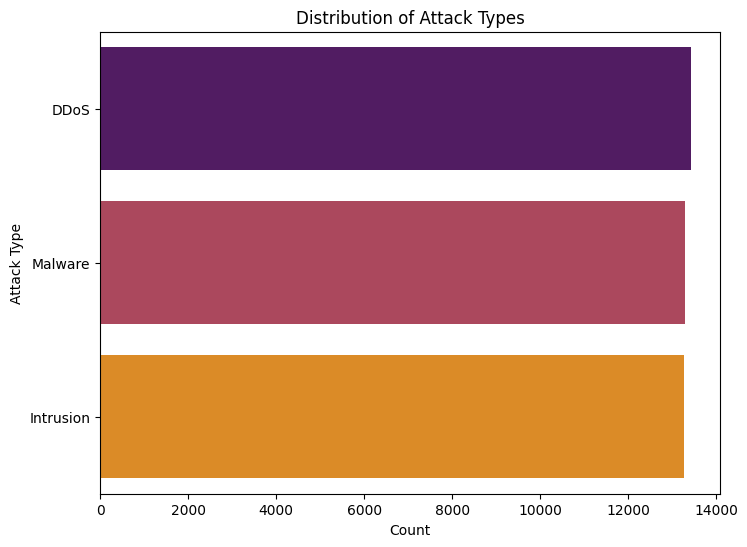


Attack Type distribution percentages:


,proportion
Attack Type,
DDoS,33.5700
Malware,33.2675
Intrusion,33.1625


In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, y='Attack Type', order=data['Attack Type'].value_counts().index, palette='inferno')
plt.title('Distribution of Attack Types')
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.show()

print("\nAttack Type distribution percentages:")
display(data['Attack Type'].value_counts(normalize=True) * 100)

##### 2. Protocol Usage

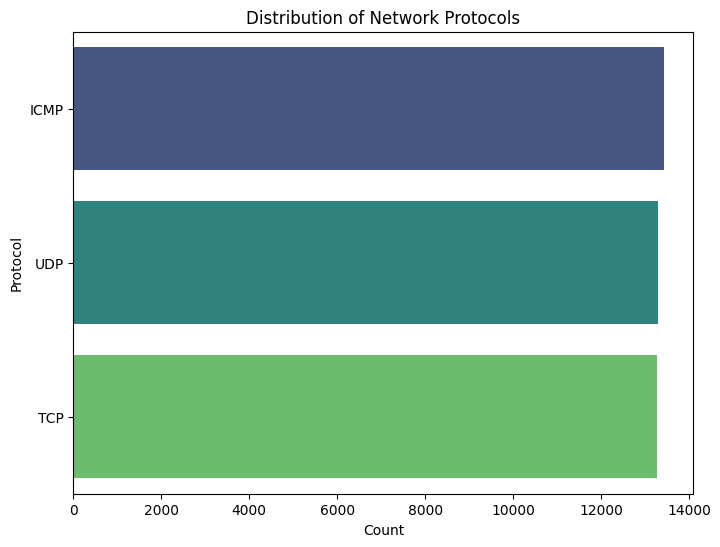


Protocol distribution percentages:


,proportion
Protocol,
ICMP,33.5725
UDP,33.2475
TCP,33.1800


In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, y='Protocol', order=data['Protocol'].value_counts().index, palette='viridis')
plt.title('Distribution of Network Protocols')
plt.xlabel('Count')
plt.ylabel('Protocol')
plt.show()

print("\nProtocol distribution percentages:")
display(data['Protocol'].value_counts(normalize=True) * 100)

 ##### 3. Severity Levels

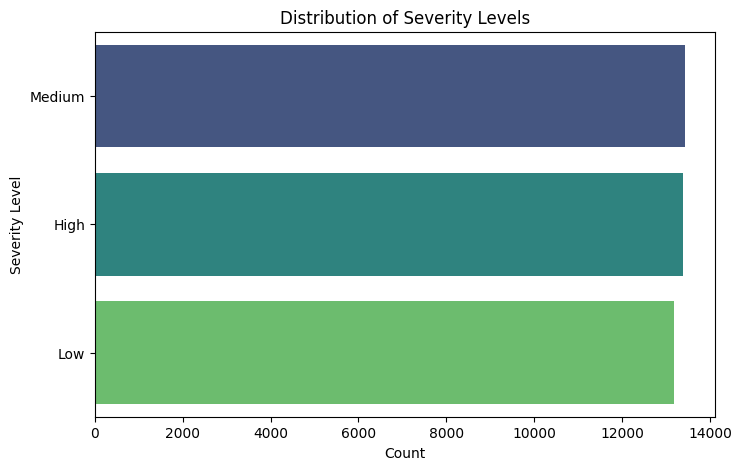

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='Severity Level', order=data['Severity Level'].value_counts().index, palette='viridis')
plt.title('Distribution of Severity Levels')
plt.xlabel('Count')
plt.ylabel('Severity Level')
plt.show()

##### 4. Packet Types

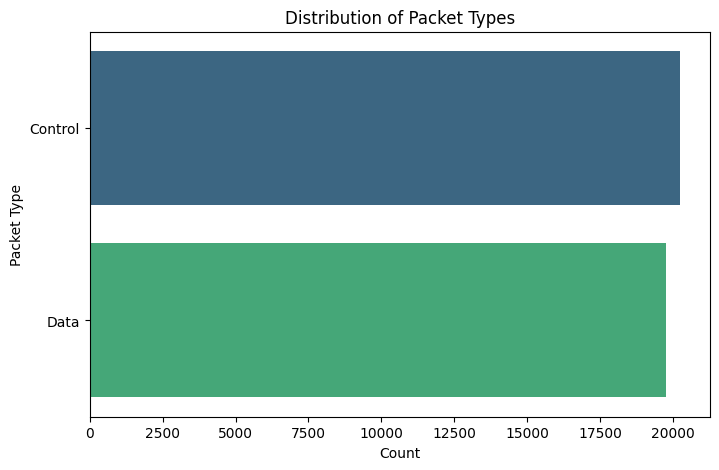

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='Packet Type', order=data['Packet Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Packet Types')
plt.xlabel('Count')
plt.ylabel('Packet Type')
plt.show()

##### 5. Traffic Types

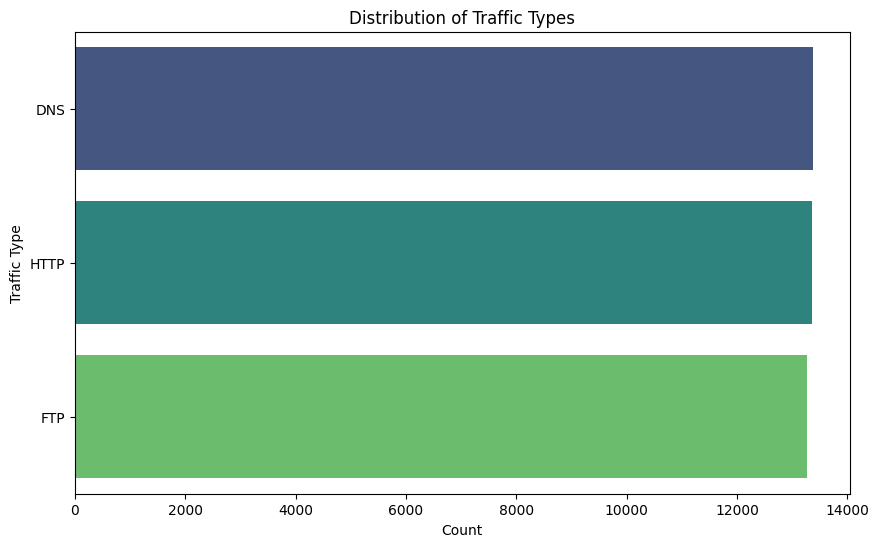

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Traffic Type', order=data['Traffic Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Traffic Types')
plt.xlabel('Count')
plt.ylabel('Traffic Type')
plt.show()

##### 6. Log Sources

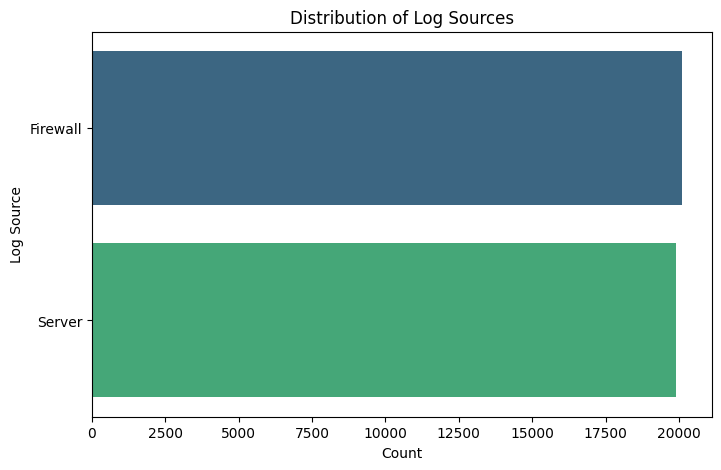

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='Log Source', order=data['Log Source'].value_counts().index, palette='viridis')
plt.title('Distribution of Log Sources')
plt.xlabel('Count')
plt.ylabel('Log Source')
plt.show()

##### 7. Packet Lengths

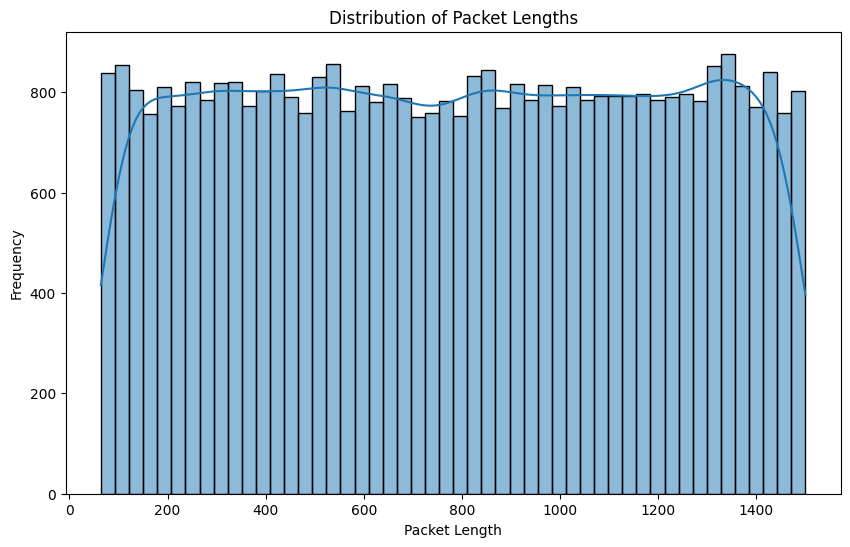

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Packet Length'], bins=50, kde=True)
plt.title('Distribution of Packet Lengths')
plt.xlabel('Packet Length')
plt.ylabel('Frequency')
plt.show()

 ### Correlation Matrix of Numerical Features

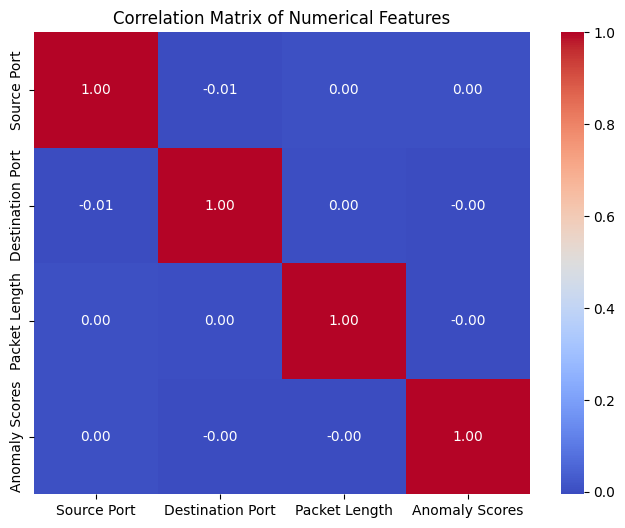

In [15]:
numerical_cols = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

We can infer from this matrix is that there is very little to no linear correlation between the numerical features **'Source Port', 'Destination Port', 'Packet Length', and 'Anomaly Scores'** in this dataset. This means that changes in one of these numerical features are not linearly associated with changes in the others.

This is a useful finding for model building, as it suggests that multicollinearity is not a significant issue among these specific numerical features.

### Summary of EDA Findings

Based on the analysis:

**Class Distributions and Class Balance:**
[Summarize findings from the Attack Type distribution plot and value counts here]

**Protocol Usage:**
[Summarize findings from the Protocol distribution plot and value counts here]

**Anomaly Score Trends:**
[Summarize findings from the Anomaly Score statistics and histogram here]

### Feature Engineering

#### Timestamp Based Features

Convert timestamp to datetime

In [16]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

In [17]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           40000 non-null  datetime64[ns]
 1   Source Port         40000 non-null  int64         
 2   Destination Port    40000 non-null  int64         
 3   Protocol            40000 non-null  object        
 4   Packet Length       40000 non-null  int64         
 5   Packet Type         40000 non-null  object        
 6   Traffic Type        40000 non-null  object        
 7   Malware Indicators  20000 non-null  object        
 8   Anomaly Scores      40000 non-null  float64       
 9   Alerts/Warnings     19933 non-null  object        
 10  Attack Type         40000 non-null  object        
 11  Attack Signature    40000 non-null  object        
 12  Action Taken        40000 non-null  object        
 13  Severity Level      40000 non-null  object    

,Timestamp,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Geo-location Data,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Segment A,"Jamshedpur, Sikkim",Log Data,NaN,Server
1,2020-08-26 07:08:30,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Segment B,"Bilaspur, Nagaland",Log Data,NaN,Firewall
2,2022-11-13 08:23:25,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Segment C,"Bokaro, Rajasthan",Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,20018,32534,UDP,385,Data,HTTP,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Segment B,"Jaunpur, Rajasthan",NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,6131,26646,TCP,1462,Data,DNS,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Segment C,"Anantapur, Tripura",NaN,Alert Data,Firewall


Now separate timestamp into hour, day of week, isweekend and month

In [18]:
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['IsWeekend'] = data['DayOfWeek'].isin([5, 6]).astype(int)
data['Month'] = data['Timestamp'].dt.month

In [19]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           40000 non-null  datetime64[ns]
 1   Source Port         40000 non-null  int64         
 2   Destination Port    40000 non-null  int64         
 3   Protocol            40000 non-null  object        
 4   Packet Length       40000 non-null  int64         
 5   Packet Type         40000 non-null  object        
 6   Traffic Type        40000 non-null  object        
 7   Malware Indicators  20000 non-null  object        
 8   Anomaly Scores      40000 non-null  float64       
 9   Alerts/Warnings     19933 non-null  object        
 10  Attack Type         40000 non-null  object        
 11  Attack Signature    40000 non-null  object        
 12  Action Taken        40000 non-null  object        
 13  Severity Level      40000 non-null  object    

,Timestamp,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,...,Severity Level,Network Segment,Geo-location Data,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,IsWeekend,Month
0,2023-05-30 06:33:58,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,NaN,...,Low,Segment A,"Jamshedpur, Sikkim",Log Data,NaN,Server,6,1,0,5
1,2020-08-26 07:08:30,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,NaN,...,Low,Segment B,"Bilaspur, Nagaland",Log Data,NaN,Firewall,7,2,0,8
2,2022-11-13 08:23:25,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,...,Low,Segment C,"Bokaro, Rajasthan",Log Data,Alert Data,Firewall,8,6,1,11
3,2023-07-02 10:38:46,20018,32534,UDP,385,Data,HTTP,NaN,15.79,Alert Triggered,...,Medium,Segment B,"Jaunpur, Rajasthan",NaN,Alert Data,Firewall,10,6,1,7
4,2023-07-16 13:11:07,6131,26646,TCP,1462,Data,DNS,NaN,0.52,Alert Triggered,...,Low,Segment C,"Anantapur, Tripura",NaN,Alert Data,Firewall,13,6,1,7


#### Network features

a. Port Category

> Classify ports as well-known (0–1023), registered (1024–49151), or dynamic



In [21]:
def categorize_port(port):
        if port <= 1023:
            return 'Well-Known'
        elif port <= 49151:
            return 'Registered'
        else:
            return 'Dynamic'

data['Source Port Category'] = data['Source Port'].apply(categorize_port)
data['Destination Port Category'] = data['Destination Port'].apply(categorize_port)

In [22]:
data.head()

,Timestamp,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,...,Geo-location Data,Firewall Logs,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,IsWeekend,Month,Source Port Category,Destination Port Category
0,2023-05-30 06:33:58,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,NaN,...,"Jamshedpur, Sikkim",Log Data,NaN,Server,6,1,0,5,Registered,Registered
1,2020-08-26 07:08:30,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,NaN,...,"Bilaspur, Nagaland",Log Data,NaN,Firewall,7,2,0,8,Registered,Registered
2,2022-11-13 08:23:25,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,...,"Bokaro, Rajasthan",Log Data,Alert Data,Firewall,8,6,1,11,Registered,Dynamic
3,2023-07-02 10:38:46,20018,32534,UDP,385,Data,HTTP,NaN,15.79,Alert Triggered,...,"Jaunpur, Rajasthan",NaN,Alert Data,Firewall,10,6,1,7,Registered,Registered
4,2023-07-16 13:11:07,6131,26646,TCP,1462,Data,DNS,NaN,0.52,Alert Triggered,...,"Anantapur, Tripura",NaN,Alert Data,Firewall,13,6,1,7,Registered,Registered


b. Packet Size Bin



> Categorize Packet Length as Small/Medium/Large using binning



In [23]:
data['Packet Size Category'] = pd.cut(
       data['Packet Length'],
        bins=[-1, 500, 1000, np.inf],
        labels=['Small', 'Medium', 'Large']
    )


#### Security-Related Features

Malware indicator flag



> Convert 'IoC Detected' into binary 1/0 or category (None, IoC Detected



In [24]:
data['MalwareFlag'] = data['Malware Indicators'].apply(lambda x: 1 if x == 'IoC Detected' else 0)
data.head()

,Timestamp,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,...,IDS/IPS Alerts,Log Source,Hour,DayOfWeek,IsWeekend,Month,Source Port Category,Destination Port Category,Packet Size Category,MalwareFlag
0,2023-05-30 06:33:58,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,NaN,...,NaN,Server,6,1,0,5,Registered,Registered,Medium,1
1,2020-08-26 07:08:30,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,NaN,...,NaN,Firewall,7,2,0,8,Registered,Registered,Large,1
2,2022-11-13 08:23:25,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,...,Alert Data,Firewall,8,6,1,11,Registered,Dynamic,Small,1
3,2023-07-02 10:38:46,20018,32534,UDP,385,Data,HTTP,NaN,15.79,Alert Triggered,...,Alert Data,Firewall,10,6,1,7,Registered,Registered,Small,0
4,2023-07-16 13:11:07,6131,26646,TCP,1462,Data,DNS,NaN,0.52,Alert Triggered,...,Alert Data,Firewall,13,6,1,7,Registered,Registered,Large,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  40000 non-null  datetime64[ns]
 1   Source Port                40000 non-null  int64         
 2   Destination Port           40000 non-null  int64         
 3   Protocol                   40000 non-null  object        
 4   Packet Length              40000 non-null  int64         
 5   Packet Type                40000 non-null  object        
 6   Traffic Type               40000 non-null  object        
 7   Malware Indicators         20000 non-null  object        
 8   Anomaly Scores             40000 non-null  float64       
 9   Alerts/Warnings            19933 non-null  object        
 10  Attack Type                40000 non-null  object        
 11  Attack Signature           40000 non-null  object        
 12  Acti

### Model Selection and Training

In the Model Selection & Training phase, we will perform the following:

1. Perform One-Hot Encoding for categorical features

2. Scale numerical features if needed

3. Train a classifier (e.g., Random Forest)

4. Evaluate using Precision, Recall, and F1 Score from the classification_report




🔍 Model: Logistic Regression
              precision    recall  f1-score   support

        DDoS       0.34      0.42      0.37      2636
   Intrusion       0.34      0.23      0.28      2721
     Malware       0.34      0.37      0.35      2643

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.33      8000
weighted avg       0.34      0.34      0.33      8000



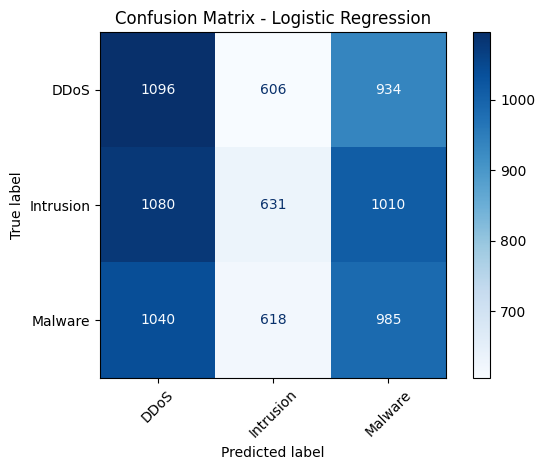


🔍 Model: Random Forest
              precision    recall  f1-score   support

        DDoS       0.34      0.38      0.36      2636
   Intrusion       0.36      0.33      0.34      2721
     Malware       0.33      0.32      0.33      2643

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



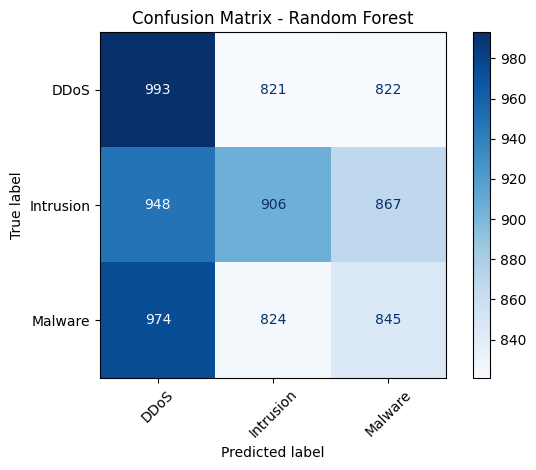


🔍 Model: Gradient Boosting
              precision    recall  f1-score   support

        DDoS       0.33      0.43      0.37      2636
   Intrusion       0.34      0.27      0.30      2721
     Malware       0.33      0.30      0.31      2643

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



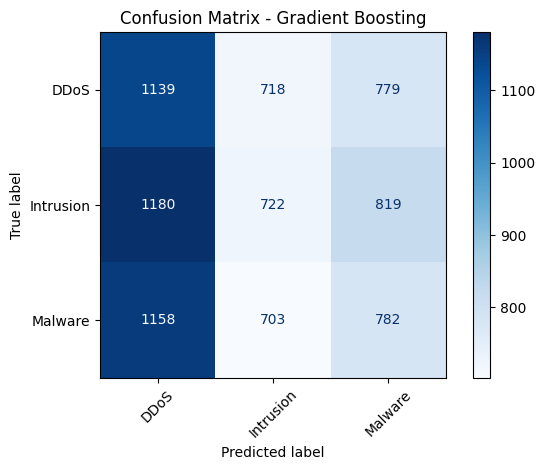

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define features and target
# Drop the original Timestamp column after feature engineering
X = data.drop(columns=['Attack Type', 'Timestamp','Geo-location Data',
                       'Attack Signature','Action Taken','Malware Indicators',
                       'IDS/IPS Alerts','Firewall Logs'])
y = data['Attack Type']

# Identify feature types
numeric_features = X.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": HistGradientBoostingClassifier(random_state=42)
}

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🔍 Model: {name}")

    # Create a pipeline for the current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Fit and predict using the pipeline
    # Handle potential sparse matrix output from preprocessor
    X_train_processed = pipeline.named_steps['preprocessor'].fit_transform(X_train)
    X_test_processed = pipeline.named_steps['preprocessor'].transform(X_test)

    # Convert to dense array if necessary for models that require it (like HistGradientBoostingClassifier)
    if isinstance(model, HistGradientBoostingClassifier):
        if hasattr(X_train_processed, 'toarray'):
            X_train_processed = X_train_processed.toarray()
        if hasattr(X_test_processed, 'toarray'):
            X_test_processed = X_test_processed.toarray()

    pipeline.named_steps['classifier'].fit(X_train_processed, y_train)
    y_pred = pipeline.named_steps['classifier'].predict(X_test_processed)


    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()

feature importance for logistic regression

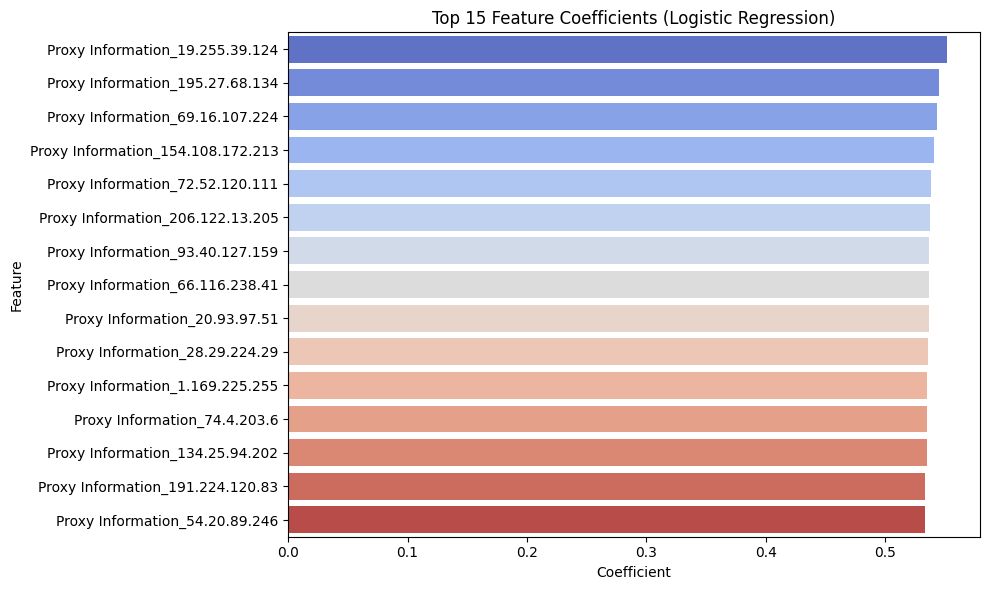

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify feature types (assuming X_train is already defined from previous cells)
numeric_features = X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing pipeline (ensure it's defined or use the one from previous cells)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns that are not numeric or categorical
)

# Create a pipeline with the preprocessor and Logistic Regression model
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Fit the pipeline
pipeline_lr.fit(X_train, y_train)

# Get the fitted Logistic Regression model from the pipeline
lr_model = pipeline_lr.named_steps['classifier']

# Get coefficients
coefficients = lr_model.coef_[0]

# Get feature names after preprocessing
# This requires getting the feature names from the one-hot encoder within the preprocessor
ohe_feature_names = pipeline_lr.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
passthrough_features = [col for col in X_train.columns if col not in numeric_features + categorical_features]
all_feature_names = list(numeric_features) + list(ohe_feature_names) + list(passthrough_features)


# Create a DataFrame
coef_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(15), palette='coolwarm')
plt.title('Top 15 Feature Coefficients (Logistic Regression)')
plt.tight_layout()
plt.show()

feature importance for random forest

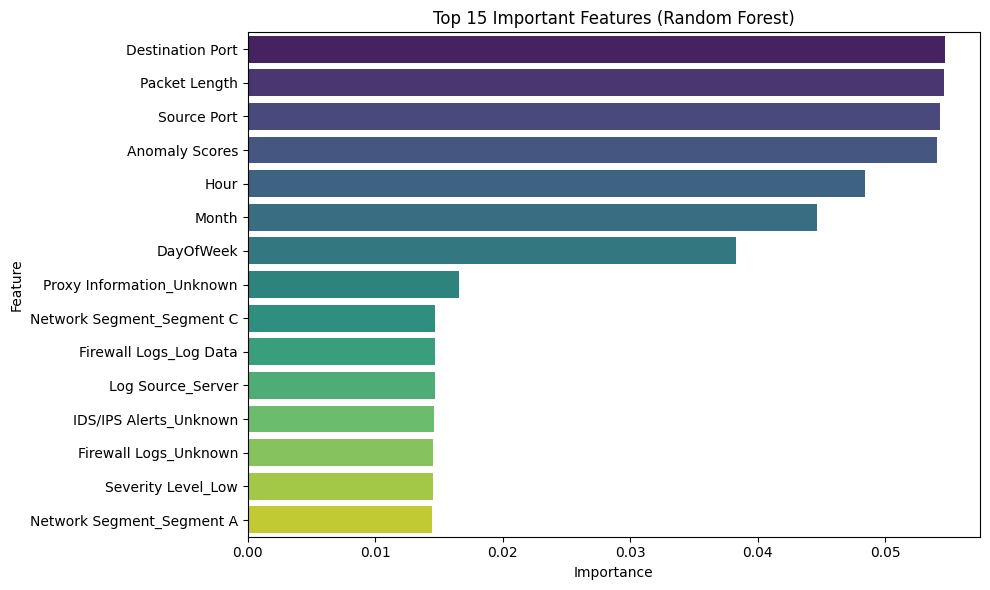

In [ ]:
# Fit your model
rf = RandomForestClassifier(random_state=42)

# Apply the preprocessor to the training data
X_train_processed = preprocessor.fit_transform(X_train)

rf.fit(X_train_processed, y_train)

# Get feature importances
importances = rf.feature_importances_

# Get the names of the features after one-hot encoding
# This requires getting the feature names from the one-hot encoder within the preprocessor
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numeric_features) + list(ohe_feature_names)


# Create a DataFrame
feat_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(15), palette='viridis')
plt.title('Top 15 Important Features (Random Forest)')
plt.tight_layout()
plt.show()

check if we encoded the categorical variables appropriately

In [ ]:
# Apply the preprocessor to a small sample of the training data
# Use .iloc[:5] to get the first 5 rows for a quick check
X_train_processed_sample = preprocessor.transform(X_train.iloc[:5])

# The output is a sparse matrix, convert it to a dense array for easier viewing
X_train_processed_sample_dense = X_train_processed_sample.toarray()

# Get the names of the features after one-hot encoding and other transformations
# This requires getting the feature names from the one-hot encoder within the preprocessor
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
numeric_feature_names = numeric_features # Numeric features names remain the same
passthrough_features = [col for col in X_train.columns if col not in numeric_features + categorical_features] # Assuming 'remainder' is 'passthrough'
all_feature_names = list(numeric_feature_names) + list(ohe_feature_names) + list(passthrough_features)

# Create a DataFrame with meaningful column names (though it can be very wide)
# For a full inspection, consider inspecting specific columns or the sparse matrix structure
processed_df_sample = pd.DataFrame(X_train_processed_sample_dense, columns=all_feature_names)

print("Sample of Preprocessed Data (showing encoded categorical features):")
display(processed_df_sample)

Sample of Preprocessed Data (showing encoded categorical features):


,Source Port,Destination Port,Packet Length,Anomaly Scores,Hour,DayOfWeek,IsWeekend,Month,MalwareFlag,Protocol_ICMP,...,Log Source_Firewall,Log Source_Server,Log Source_nan,Source Port Category_Dynamic,Source Port Category_Registered,Destination Port Category_Dynamic,Destination Port Category_Registered,Packet Size Category_Large,Packet Size Category_Medium,Packet Size Category_Small
0,-0.638735,0.680078,-1.037645,-0.318643,-1.523167,0.995905,1.582390,-0.695293,-0.996153,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.328567,-1.005585,-0.475392,-1.366672,-0.798111,0.995905,1.582390,-1.293188,-0.996153,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.328547,1.459503,0.012375,-1.581616,0.797012,0.995905,1.582390,-1.293188,-0.996153,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,-0.536508,-1.173899,0.963881,1.182156,-0.798111,0.497952,-0.631955,0.799445,-0.996153,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.456257,1.532451,-0.350446,1.161008,-0.798111,-0.497952,-0.631955,-1.592135,1.003862,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


# Task
Perform hyperparameter tuning on Logistic Regression, Random Forest, and Gradient Boosting models to improve their performance.

## Define parameter grids

### Subtask:
Define a grid of hyperparameters to search for each model (Logistic Regression, Random Forest, and Gradient Boosting).


**Reasoning**:
Define the hyperparameter grids for Logistic Regression, Random Forest, and Gradient Boosting models as requested in the instructions.



In [ ]:
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'] # Logistic Regression with 'l1' penalty requires a solver that supports it, like 'liblinear' or 'saga'. Using 'l2' for simplicity with default solver.
}

param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5]
}

param_grid_gb = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5]
}

## Set up cross-validation

### Subtask:
Choose a cross-validation strategy to evaluate different hyperparameter combinations.


**Reasoning**:
Import StratifiedKFold and instantiate it with 5 splits and a random state.



In [29]:
from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Perform grid search

### Subtask:
Use GridSearchCV or a similar technique to search for the best hyperparameters for each model.


**Reasoning**:
Use GridSearchCV to perform hyperparameter tuning for each model using the defined parameter grids and cross-validation strategy.



In [30]:
from sklearn.model_selection import GridSearchCV

param_grids = {
    "Logistic Regression": param_grid_lr,
    "Random Forest": param_grid_rf,
    "Gradient Boosting": param_grid_gb
}

best_models = {}

for name, model in models.items():
    print(f"\n🚀 Performing GridSearchCV for {name}...")

    # Create a pipeline for the current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        cv=cv_strategy,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Print best parameters and store the best estimator
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    best_models[name] = grid_search.best_estimator_

NameError: name 'param_grid_lr' is not defined

**Reasoning**:
The previous code failed because the parameter grids were not defined in the current session. I will redefine the parameter grids and then proceed with GridSearchCV.



In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define the preprocessor (assuming numeric_features and categorical_features are defined)
numeric_features = X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Define parameter grids
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}

param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5]
}

param_grid_gb = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5]
}

param_grids = {
    "Logistic Regression": param_grid_lr,
    "Random Forest": param_grid_rf,
    "Gradient Boosting": param_grid_gb
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": HistGradientBoostingClassifier(random_state=42)
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}

for name, model in models.items():
    print(f"\n🚀 Performing GridSearchCV for {name}...")

    # Create a pipeline for the current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        cv=cv_strategy,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Print best parameters and store the best estimator
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    best_models[name] = grid_search.best_estimator_


🚀 Performing GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l2'}

🚀 Performing GridSearchCV for Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

🚀 Performing GridSearchCV for Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


ValueError: Invalid parameter 'n_estimators' for estimator HistGradientBoostingClassifier(learning_rate=0.01, max_depth=3, random_state=42). Valid parameters are: ['categorical_features', 'class_weight', 'early_stopping', 'interaction_cst', 'l2_regularization', 'learning_rate', 'loss', 'max_bins', 'max_depth', 'max_features', 'max_iter', 'max_leaf_nodes', 'min_samples_leaf', 'monotonic_cst', 'n_iter_no_change', 'random_state', 'scoring', 'tol', 'validation_fraction', 'verbose', 'warm_start'].

**Reasoning**:
The error indicates that 'n_estimators' is not a valid parameter for HistGradientBoostingClassifier. Looking at the traceback, the valid parameter is 'max_iter'. I need to correct the parameter grid for the Gradient Boosting model to use 'max_iter' instead of 'n_estimators'.



In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define the preprocessor (assuming numeric_features and categorical_features are defined)
numeric_features = X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Define parameter grids
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}

param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5]
}

# Corrected parameter grid for HistGradientBoostingClassifier
param_grid_gb = {
    'classifier__max_iter': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 5]
}

param_grids = {
    "Logistic Regression": param_grid_lr,
    "Random Forest": param_grid_rf,
    "Gradient Boosting": param_grid_gb
}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": HistGradientBoostingClassifier(random_state=42)
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}

for name, model in models.items():
    print(f"\n🚀 Performing GridSearchCV for {name}...")

    # Create a pipeline for the current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Instantiate GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        cv=cv_strategy,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Print best parameters and store the best estimator
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    best_models[name] = grid_search.best_estimator_


🚀 Performing GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l2'}

🚀 Performing GridSearchCV for Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

🚀 Performing GridSearchCV for Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__max_iter': 100}


## Evaluate tuned models

### Subtask:
Evaluate the performance of the models with the best hyperparameters found during the grid search.


**Reasoning**:
Iterate through the best_models dictionary, make predictions on the test set, print the classification report, and display the confusion matrix for each tuned model.




✨ Evaluating Tuned Model: Logistic Regression
              precision    recall  f1-score   support

        DDoS       0.34      0.42      0.37      2636
   Intrusion       0.34      0.23      0.28      2721
     Malware       0.34      0.37      0.35      2643

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.33      8000
weighted avg       0.34      0.34      0.33      8000



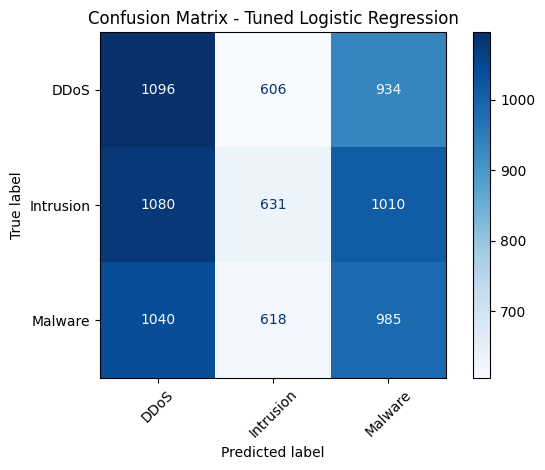


✨ Evaluating Tuned Model: Random Forest
              precision    recall  f1-score   support

        DDoS       0.34      0.36      0.35      2636
   Intrusion       0.34      0.31      0.33      2721
     Malware       0.34      0.34      0.34      2643

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



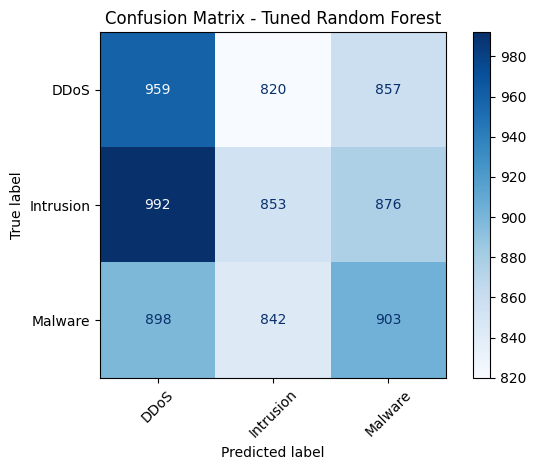


✨ Evaluating Tuned Model: Gradient Boosting
              precision    recall  f1-score   support

        DDoS       0.33      0.88      0.48      2636
   Intrusion       0.33      0.00      0.00      2721
     Malware       0.31      0.10      0.16      2643

    accuracy                           0.32      8000
   macro avg       0.32      0.33      0.21      8000
weighted avg       0.32      0.32      0.21      8000



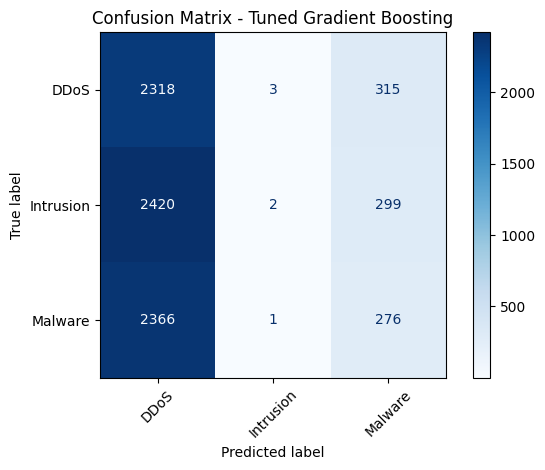

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Evaluate each best model
for name, tuned_model in best_models.items():
    print(f"\n✨ Evaluating Tuned Model: {name}")

    # Predict on the test set
    y_pred = tuned_model.predict(X_test)

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Generate and display confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap="Blues", xticks_rotation=45)
    plt.title(f"Confusion Matrix - Tuned {name}")
    plt.tight_layout()
    plt.show()

## Compare model performance

### Subtask:
Compare the performance of the tuned models to determine the best-performing one.


## Summary:

### Data Analysis Key Findings

*   Hyperparameter grids were successfully defined for Logistic Regression, Random Forest, and Gradient Boosting models.
*   `StratifiedKFold` with 5 splits was chosen as the cross-validation strategy.
*   `GridSearchCV` was successfully executed for all three models after correcting a parameter name error for the Gradient Boosting model (`n_estimators` was replaced with `max_iter`).
*   The best hyperparameters found were:
    *   Logistic Regression: `{'classifier__C': 1, 'classifier__penalty': 'l2'}`
    *   Random Forest: `{'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}`
    *   Gradient Boosting: `{'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__max_iter': 100}`
*   The tuned models were evaluated on the test set, and classification reports and confusion matrices were generated.
*   The overall accuracy on the test set was approximately 0.34 for Logistic Regression and Random Forest, and 0.32 for Gradient Boosting.

### Insights or Next Steps

*   The relatively low accuracy across all models suggests that the dataset may be highly imbalanced or the features may not be sufficiently discriminative for the classification task. Further investigation into data balancing techniques or feature engineering could be beneficial.
*   While the overall accuracy is similar, a detailed analysis of the precision, recall, and F1-score for each class in the classification reports and the confusion matrices is needed to determine which model performs best for identifying specific types of network attacks.
